# Chapter8 차원 축소

많은 경우 머신러닝 문제는 훈련 샘플 각각이 수천 심지어 수백만 개의 특성을 가지고 있다. 이는 훈련을 느리게 할 뿐만 아니라, 좋은 솔루션을 찾기 어렵게 만든다. 이러한 문제를 '차원의 저주'라고 한다.

차원 축소는 훈련 속도를 높여줄 뿐만 아니라 데이터 시각화에도 유용하다. 차원 수를 둘로, 혹은 셋으로 줄이면 고차원 훈련 세트를 하나의 그래프로 그릴 수 있고 군집 같은 시각적인 패턴을 감지해 중요한 통찰을 얻는 경우가 많다. 차원 축소에 사용되는 접근 방법에는 투영과 매니폴드 학습 등이 있다. 그리고 차원 축소 기법 중에서는 PCA, 커널 PCA, LLE 가 가장 인기가 있다.

## 8.1 차원의 저주

단위 면적에서 임의의 두 점을 선택하면 두 점 사이의 거리는 평균적으로 대략 0.52가 되며, 3차원 큐브에서 임의의 두 점을 선택하면 평균 거리는 대략 0.66이다. 그런데 1,000,000차원의 초입방체에서 두 점을 무작위로 선택하면 평균 거리는 약 428.25이다. 이는 고차원의 데이터셋이 매우 희박한 상태일 수 있음을 의미한다. 대부분의 훈련 데이터가 서로 멀리 떨어져 있다는 것이다. 이는 새로운 샘플도 훈련 샘플과 멀리 떨어져 있을 가능성이 높다는 뜻이다. 이 경우 예측을 위해 훨씬 많은 외삽*을 해야 하기 때문에 저차원일 때보다 예측이 더 불안정하다. 간단히 말해 훈련 세트의 차원이 클수록 과대적합 위험이 커진다. 

*외삽: 이용가능한 자료의 범위가 한정되어 있어 그 범위 이상의 값을 구할 수 없을 때 관측된 값을 이용하여 한계점 이상의 값을 추정하는 것이다.

이론적으로 차원의 저주를 해결하는 해결책 하나는 훈련 샘플의 밀도가 충분히 높아질 때까지 훈련 세트의 크기를 키우는 것이다. 그러나 실제로는 일정 밀도에 도달하기 위해 필요한 훈련 샘플 수는 차원 수가 커짐에 따라 기하급수적으로 늘어난다. 따라서 실제로는 적용하기 어려운 해결책이라고 볼 수 있다.

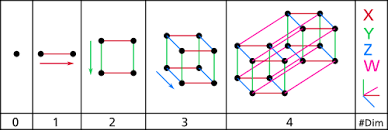

## 8.2 차원 축소를 위한 접근 방법

차원을 감소시키는 두 가지 주요한 접근법 : 투영(projection), 매니폴드 학습(Manifold Learning)

### 8.2.1 투영

대부분의 문제에서 훈련 샘플은 모든 차원에 걸쳐 균일하게 퍼져 있지 않다. 많은 특성은 거의 변화가 없는 반면, 다른 특성들은 서로 강하게 연관되어 있다. MNIST 데이터셋의 경우에도 이미지의 테두리는 거의 항상 흰색이고 중심부 픽셀들은 인접 픽셀과 강하게 연관되어 있다. 결과적으로 모든 훈련 샘플이 고차원 공간 안의 저차원 부분 공간(subspace)에 놓여 있다. 

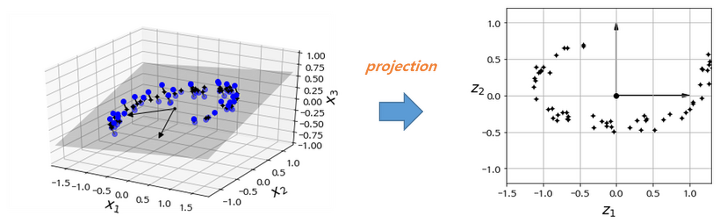

이처럼 3차원 데이터셋이지만 모든 훈련 샘플이 거의 평면 형태로 놓여있기 때문에(저차원 부분 공간에 놓여있기 때문에) 훈련 샘플을 부분 공간에 수직으로 투영하면 2D 데이터셋을 얻을 수 있다. 데이터셋의 차원을 3D에서 2D로 줄인 것이다.

하지만 차원 축소에 있어서 투영이 언제나 최선의 방법인 것은 아니다.

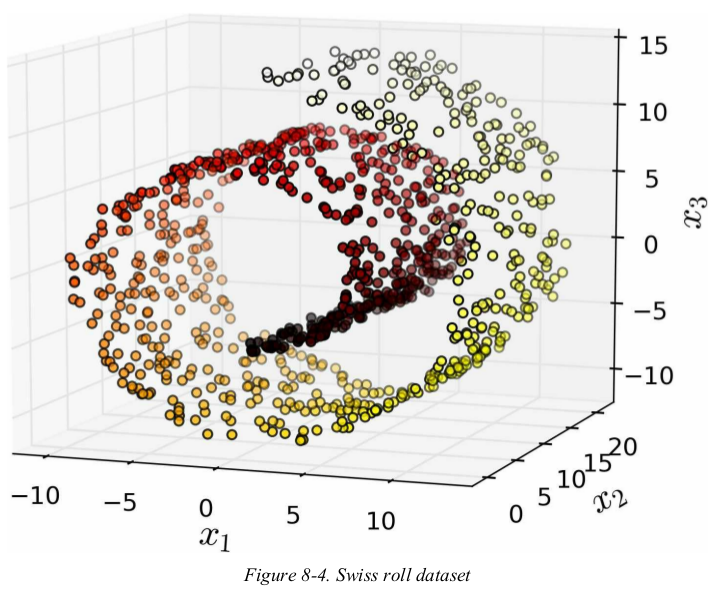

위의 스위스 롤 데이터셋처럼 부분 공간이 뒤틀리거나 휘어있는 경우, 그냥 평면에 투영시키면 스위스 롤의 층이 서로 뭉개진다.

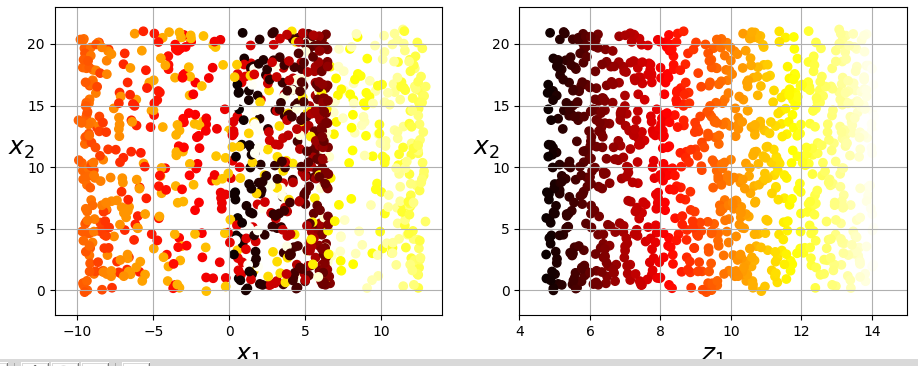

왼쪽 이미지는 스위스 롤 데이터셋을 그냥 평면에 투영시킨 것이고, 오른쪽은 스위스 롤을 펼쳐놓은 것이다.

### 8.2.2 매니폴드 학습

2D 매니폴드는 고차원 공간에서 휘어지거나 뒤틀린 2D 모양으로, 위에서 본 스위스 롤이 그 예다. 

많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동하는데, 이를 매니폴드 학습이라고 한다. 이는 대부분 실제 고차원 데이터셋이 더 낮은 저차원 매니폴드에 가깝게 놓여 있다는 매니폴드 가정 또는 매니폴드 가설에 근거한다. 

매니폴드 가정은 '처리해야 할 작업이 저차원의 매니폴드 공간에 표현되면 더 간단해질 것이다.'라는 또 다른 가정과 병행되곤 한다. 하지만 이런 가정이 항상 유효한 것은 아니다. 이는 전적으로 데이터셋에 달렸다. 

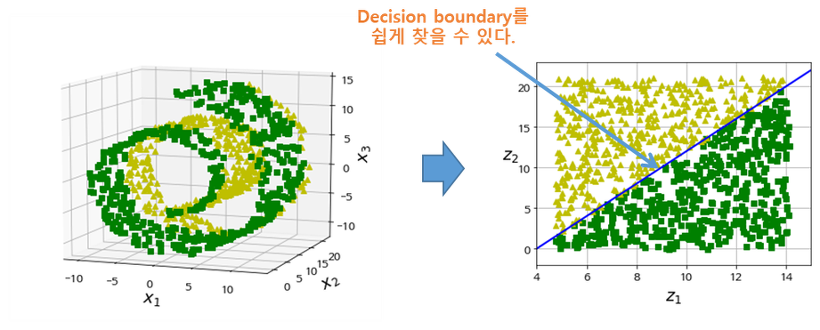

이러한 경우에는 저차원일 때 결정 경계를 더 쉽게 찾을 수 있다.

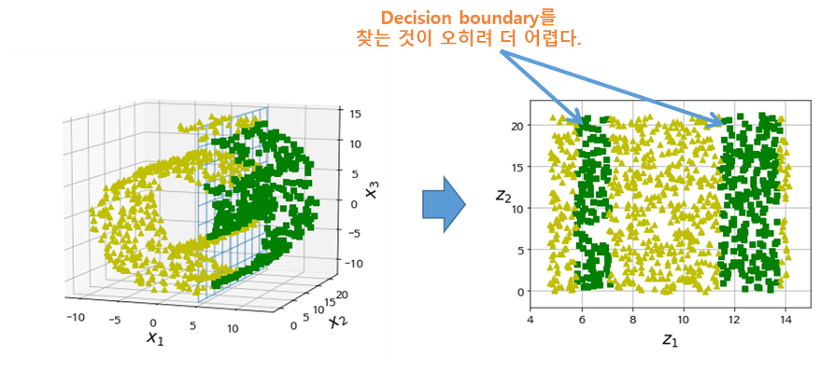

하지만 이 경우에는 3D 공간에서는 수직 평면 형태의 간단한 결정 경계를 찾을 수 있지만, 저차원에 표현해보니 오히려 결정 경계를 찾기가 더 어렵다.

## 8.3 PCA

주성분 분석(Principal Component Analysis; PCA)은 가장 인기 있는 차원 축소 알고리즘이다. 먼저 데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영시킨다. 

### 8.3.1 분산 보존

저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 한다.

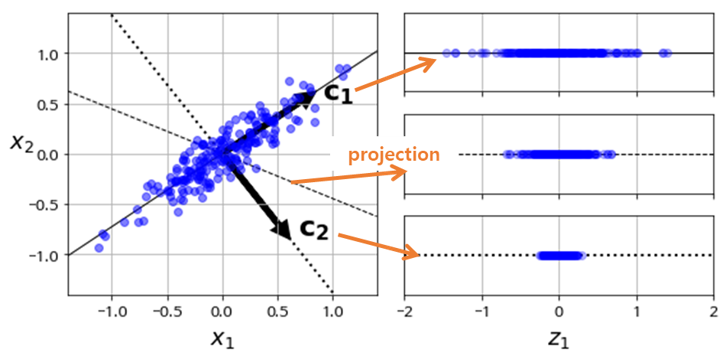

실선에 투영된 것은 분산을 최대로 보존하는 반면, 점선에 투영된 것은 분산을 매우 적게 유지하고 있다. 가운데의 파선에 투영된 것은 분산을 중간 정도로 유지하고 있다. 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적이다. 이 선택을 다른 방식으로 설명하면 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화하는 축이다. 

### 8.3.2 주성분

PCA(주성분 분석)는 훈련 세트에서 분산이 최대인 축을 찾는다. 위의 그림에서는 실선이 이에 해당된다. 그 다음으로는 첫 번째 축에 직교하고 남은 분산을 최대한 보존하는 두 번째 축을 찾는다. 위의 경우에는 2D이므로 선택의 여지 없이 점선이 된다. 만약 고차원 데이터셋이라면 PCA는 이전의 두 축에 직교하는 세 번째 축을 찾으며 데이터셋에 있는 차원의 수만큼 네 번째, 다섯 번째, ... 축을 찾는다. 

i번째 축을 정의하는 단위 벡터를 i번째 주성분(principal component; PC)이라고 부른다. 위의 그림에서는 첫 번째 PC는 c1이고 두 번째 PC는 c2이다. 

훈련 세트의 주성분을 찾으려면 특잇값 분해(SVD)라는 표준 행렬 분해 기술을 사용하면 된다. 

In [5]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴더
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "dim_reduction"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [6]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [7]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

numpy의 svd() 함수를 사용해 훈련 세트의 모든 주성분을 구한 후 처음 두 개의 PC를 추출했다. 

### 8.3.3 d차원으로 투영하기

주성분을 모두 추출해냈다면 처음 d개의 주성분으로 정의한 초평면에 투영하여 데이터셋의 차원을 d차원으로 축소시킬 수 있다.

In [8]:
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)

첫 두 개의 주성분으로 정의된 평면에 훈련 세트를 투영했다. 

### 8.3.4 사이킷런 사용하기

In [9]:
from sklearn.decomposition import PCA #사이킷런의 PCA 모델은 SVD 분해 방법을 사용해 구현한다.

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

PCA 모델을 사용해 데이터셋의 차원을 2로 줄였다. (사이킷런의 PCA 모델은 자동으로 데이터를 중앙에 맞춰준다.)

In [10]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

components_ 변수를 사용해 주성분을 확인할 수 있다.

### 8.3.5 설명된 분산의 비율

In [11]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

explained_variance_ratio_ 변수에 저장된 주성분의 설명된 분산의 비율을 확인했다. 설명된 분산의 비율은 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타낸다. 

위의 결과는 데이터셋 분산의 84.2%가 첫 번째 축에 놓여 있고 14.6%가 두 번째 축에 놓여 있음을 보여준다. 세 번째 축은 100%에서 두 비율을 뺀 1.2% 미만이 남아 있을 것이므로 아주 적은 양의 정보가 있다는 사실을 알 수 있다.

In [1]:
import ssl
import urllib
from six.moves import urllib
from sklearn.datasets import fetch_openml

In [2]:
import numpy as np

In [3]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [4]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

### 8.3.6 적절한 차원 수 선택하기

축소할 차원 수는 임의로 정하기보다는 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 쪽이 더 낫다. 물론 데이터 시각화를 위해 차원을 축소하는 경우에는 차원을 2개나 3개로 줄이는 것이 일반적이다. 

In [13]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_Variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

MemoryError: Unable to allocate 314. MiB for an array with shape (52500, 784) and data type float64

차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분산을 95%로 유지하는 데 필요한 최소한의 차원 수를 계산하려고 했는데 에러^-^,,

### 8.3.7 압축을 위한 PCA

차원을 축소하고 나면 훈련 세트의 크기가 줄어든다. 이렇게 압축시킨 데이터셋에 PCA 투영의 변환을 반대로 적용하여 원래의 차원으로 되돌릴 수도 있다. 그러나 투영에서 일정량의 정보를 잃어버렸기 때문에 온전한 원본 데이터셋을 얻을 수는 없다. 그러나 원본 데이터와 거의 비슷한 데이터셋을 얻을 수 있다. 원본 데이터와 재구성된 데이터 사이의 평균 제곱 거리를 재구성 오차라고 한다.

In [15]:
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inversed_transform(X_reduced)

MemoryError: Unable to allocate 314. MiB for an array with shape (52500, 784) and data type float64

MNIST 데이터셋을 154차원으로 압축하고 inverse_transform() 메서드를 사용해 784차원으로 복원하려고 했지만 에러

### 8.3.8 점진적 PCA